# Exploração dados MEIC - Luis
# Utilização de Consensus Clustering
## Evidence Accumulation Clustering

In [1]:
import numpy as np

In [3]:
%pip install biosppy

  Using cached biosppy-0.8.0.tar.gz (1.5 MB)
  Using cached bidict-0.22.0-py3-none-any.whl (36 kB)
  Using cached h5py-3.7.0-cp37-cp37m-win_amd64.whl (2.6 MB)
  Using cached shortuuid-1.0.9-py3-none-any.whl (9.4 kB)
  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)
Using legacy setup.py install for biosppy, since package 'wheel' is not installed.
    Running setup.py install for biosppy: started
    Running setup.py install for biosppy: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Tese\workspace\Driver-Profile-Classification\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
from biosppy import clustering

In [5]:
dados=np.loadtxt('../datasets/normalization/trips_st_c.csv',delimiter=',',skiprows=1)
# https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

In [6]:
ndados=len(dados)
ndados
int(np.sqrt(ndados))

120

In [ ]:
# https://biosppy.readthedocs.io/en/stable/biosppy.html#biosppy.clustering.consensus_kmeans
#data=None, k=0, linkage='average', nensemble=100, kmin=None, kmax=None)
#clusters= clustering.consensus_kmeans(dados,k = 3, linkage='average', kmin = 60, kmax=100)

In [7]:
# 3rd party
import numpy as np
import scipy.cluster.hierarchy as sch
import scipy.cluster.vq as scv
import scipy.sparse as sp
import sklearn.cluster as skc
from sklearn.model_selection import ParameterGrid


In [9]:
def mykmeans(data=None,
           k=None,
           init='random',
           max_iter=300,
           n_init=10,
           tol=0.0001):
    """Perform clustering using the k-means algorithm.
    Parameters
    ----------
    data : array
        An m by n array of m data samples in an n-dimensional space.
    k : int
        Number of clusters to extract.
    init : str, array, optional
        If string, one of 'random' or 'k-means++'; if array, it should be of
        shape (n_clusters, n_features), specifying the initial centers.
    max_iter : int, optional
        Maximum number of iterations.
    n_init : int, optional
        Number of initializations.
    tol : float, optional
        Relative tolerance to declare convergence.
    Returns
    -------
    clusters : dict
        Dictionary with the sample indices (rows from 'data') for each found
        cluster; outliers have key -1; clusters are assigned integer keys
        starting at 0.
    """

    # check inputs
    if data is None:
        raise TypeError("Please specify input data.")

    if k is None:
        raise TypeError("Please specify the number 'k' of clusters.")

    clf = skc.KMeans(n_clusters=k,
                     init=init,
                     max_iter=max_iter,
                     n_init=n_init,
                     tol=tol)
    labels = clf.fit_predict(data)
    #print(labels)
    # get cluster indices
    #clusters = _extract_clusters(labels)

    return labels

## criação do clustering ensemble

In [10]:
kmin= 20#60
kmax= 50#100
nensemble = 30
ks = np.random.randint(low=kmin, high=kmax, size=nensemble)
ensemble=[]
for i in range(len(ks)):
    clusters = mykmeans(data=dados,k=ks[i],max_iter=100)
    print(".")
    ensemble.append(clusters)

.
.


KeyboardInterrupt: 

In [26]:
len(ensemble)

30

In [40]:
# entretanto percebi que estava a fazer uma manipulacao ao output do sklearn e tive de colocar isto aqui
lista=[]
for i in range(len(ensemble)):
    labels=ensemble[i].tolist()
    clusters = clustering._extract_clusters(labels)
    lista.append(clusters)

In [41]:
lista

[{0: array([   77,  1243,  1323,  1470,  1559,  1918,  1969,  2121,  2179,
          3652,  3709,  3753,  3757,  3776,  3809,  3825,  3845,  3884,
          3907,  3910,  3911,  3912,  3918,  4088,  4091,  4096,  4098,
          4109,  4114,  4383,  4552,  4582,  4666,  5324,  5353,  5396,
          5418,  5431,  5439,  5450,  5468,  5482,  5499,  5510,  5521,
          5583,  5621,  5645,  5848,  5886,  5942,  5976,  5984,  5992,
          6015,  6019,  6036,  6054,  6055,  6058,  6167,  6302,  6327,
          6409,  6410,  6482,  6504,  6507,  6532,  6555,  6560,  6584,
          6612,  6613,  6621,  6634,  6645,  6646,  6652,  6654,  6662,
          6666,  6674,  6699,  6866,  6961,  7066,  7069,  7448,  7464,
          7471,  7483,  7494,  7501,  7560,  7719,  7731,  7742,  7761,
          7779,  7785,  7799,  7864,  7867,  7896,  7901,  7974,  8331,
          8352,  8365,  8378,  8384,  8428,  8451,  8485,  8499,  8568,
          8610,  9007,  9009,  9013,  9019,  9020,  9528,  97

In [37]:
len(dados)

14586

In [38]:
len(lista[0])

14586

## co-assoc creation 

In [42]:
# generate coassoc
coassoc, = clustering.create_coassoc(ensemble=lista, N=len(dados))

/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [43]:
coassoc.shape

(14586, 14586)

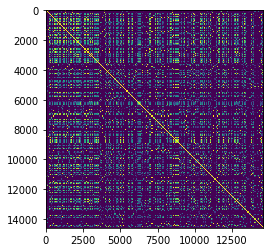

In [47]:
import matplotlib.pyplot as plt
plt.imshow(coassoc, interpolation='nearest')#, cmap=plt.cm.ocean, extent=(0.5,10.5,0.5,10.5))


## extraccao da partição final (consensus partition)

In [44]:
k = 3
linkage = 'average'
# extract partition
clusters, = clustering.coassoc_partition(coassoc=coassoc, k=k, linkage=linkage)

In [45]:
clusters

{0: array([    0,     1,     2, ..., 14583, 14584, 14585]),
 1: array([   15,   131,   432,   436,   589,   782,   888,  1129,  1136,
         1227,  1280,  1448,  1507,  1510,  1895,  2029,  2128,  2298,
         2352,  2370,  2540,  2767,  3101,  3152,  3178,  3322,  3405,
         3524,  3663,  3671,  3777,  4078,  4236,  4302,  4333,  4475,
         4519,  4521,  4524,  4555,  4607,  4641,  4704,  4912,  5277,
         5342,  5414,  5679,  5838,  5845,  5856,  6305,  6358,  6500,
         6522,  6530,  6611,  6615,  6751,  6760,  6805,  6844,  6851,
         6990,  6999,  7043,  7045,  7241,  7275,  7383,  7468,  7524,
         7585,  7587,  7627,  7753,  7838,  8045,  8085,  8110,  8157,
         8188,  8340,  8386,  8415,  8441,  8480,  8504,  8513,  8588,
         8733,  8899,  8946,  8950,  8951,  8984,  9364,  9365,  9466,
         9492,  9772,  9786,  9859,  9887,  9911,  9914,  9916, 10091,
        10217, 10285, 10336, 10394, 10419, 10421, 10512, 10530, 10580,
        10605,